In [10]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
}
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'a367be8b-b6e2-4022-b0fd-7a9a21e68298', # you can use it just ask me first
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)  
    
#Note:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

{'status': {'timestamp': '2023-12-31T17:59:04.209Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 8961}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10690, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [11]:
type(data)

dict

In [37]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [15]:
# Normalizes the data and makes it  all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10690,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.958587e+07,1.958587e+07,False,NaN,1,NaN,NaN,None,2023-12-31T17:57:00.000Z,42589.919161,1.556170e+10,-16.9752,-0.034947,0.238908,-2.453966,9.790361,23.591567,51.753305,8.341605e+11,50.0919,8.943883e+11,None,2023-12-31T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:00:32.988506
1,1027,Ethereum,ETH,ethereum,8149,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201831e+08,1.201831e+08,True,NaN,2,NaN,NaN,None,2023-12-31T17:57:00.000Z,2297.039370,6.573964e+09,-17.3740,-0.341097,-0.418669,0.239201,9.697367,27.334639,35.948194,2.760653e+11,16.5779,2.760653e+11,None,2023-12-31T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:00:32.988506
2,825,Tether USDt,USDT,tether,70142,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.169960e+10,9.460306e+10,True,NaN,3,NaN,NaN,None,2023-12-31T17:57:00.000Z,0.999761,3.048941e+10,-13.4742,0.006070,0.000738,-0.074467,-0.034482,-0.044331,-0.037970,9.167773e+10,5.5053,9.458049e+10,None,2023-12-31T17:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-31 20:00:32.988506
3,1839,BNB,BNB,bnb,1953,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516922e+08,1.516922e+08,False,NaN,4,NaN,NaN,None,2023-12-31T17:57:00.000Z,316.944807,9.329516e+08,-1.1686,-0.047526,-0.446557,17.781614,38.896939,41.085792,46.270207,4.807807e+10,2.8871,4.807807e+10,None,2023-12-31T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:00:32.988506
4,5426,Solana,SOL,solana,563,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.292963e+08,5.660518e+08,True,NaN,5,NaN,NaN,None,2023-12-31T17:57:00.000Z,104.215112,1.643492e+09,-23.4301,0.559543,0.500238,-9.327853,72.186277,141.448838,332.329463,4.473916e+10,2.6866,5.899116e+10,None,2023-12-31T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:00:32.988506
5,52,XRP,XRP,xrp,1194,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.412515e+10,9.998810e+10,False,NaN,6,NaN,NaN,None,2023-12-31T17:57:00.000Z,0.621823,6.089431e+08,-24.9852,-0.302331,-0.793602,0.117402,2.063057,3.290663,19.170659,3.365626e+10,2.0211,6.218230e+10,None,2023-12-31T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:00:32.988506
6,3408,USDC,USDC,usd-coin,15884,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.462502e+10,2.462502e+10,False,NaN,7,NaN,NaN,None,2023-12-31T17:57:00.000Z,1.000185,3.346452e+09,-23.0695,0.010398,0.023800,0.022368,0.034765,0.020825,0.023293,2.462959e+10,1.4790,2.462959e+10,None,2023-12-31T17:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-31 20:00:32.988506
7,2010,Cardano,ADA,cardano,1015,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.536648e+10,3.648438e+10,False,NaN,8,NaN,NaN,None,2023-12-31T17:57:00.000Z,0.601695,3.615177e+08,-15.4584,-0.322812,-1.287029,-1.844044,56.791449,105.964702,127.110848,2.127985e+10,1.2779,2.707629e+10,None,2023-12-31T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:00:32.988506
8,5805,Avalanche,AVAX,avalanche,623,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p

In [33]:

def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'a367be8b-b6e2-4022-b0fd-7a9a21e68298',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df 
    
    if not os.path.isfile(r'D:\python_web_scraping\output-folder\API.csv'):
        df.to_csv(r'D:\python_web_scraping\output-folder\API.csv', header = 'columns_names')
    else:
        df.to_csv(r'D:\python_web_scraping\output-folder\API.csv', mode = 'a', header = False)
        

In [35]:
import os
from time import time, sleep

for i in range(333):
    api_runner()
    print('API Runner comleted successfully')
    sleep(10) #sleep for 1 minute
exit()

API Runner comleted successfully
API Runner comleted successfully


KeyboardInterrupt: 

In [45]:

df1 = pd.read_csv(r'D:\python_web_scraping\output-folder\API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10690,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.958596e+07,1.958596e+07,False,NaN,1,NaN,NaN,NaN,2023-12-31T18:32:00.000Z,42608.109588,1.548302e+10,-16.0840,0.249380,0.470436,-2.364863,9.832995,23.138676,52.108066,8.345206e+11,50.1729,8.947703e+11,NaN,2023-12-31T18:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:34:08.564974
1,1,1027,Ethereum,ETH,ethereum,8149,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201831e+08,1.201831e+08,True,NaN,2,NaN,NaN,NaN,2023-12-31T18:32:00.000Z,2294.173247,6.560084e+09,-16.2161,-0.033269,-0.399678,0.341420,9.651313,26.151048,36.117953,2.757208e+11,16.5768,2.757208e+11,NaN,2023-12-31T18:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:34:08.564974
2,2,825,Tether USDt,USDT,tether,70142,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.169960e+10,9.460306e+10,True,NaN,3,NaN,NaN,NaN,2023-12-31T18:32:00.000Z,0.999575,3.040353e+10,-12.4740,-0.037017,-0.039984,-0.103814,-0.046245,-0.053015,-0.059759,9.166067e+10,5.5108,9.456289e+10,NaN,2023-12-31T18:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-31 20:34:08.564974
3,3,1839,BNB,BNB,bnb,1953,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.516922e+08,1.516922e+08,False,NaN,4,NaN,NaN,NaN,2023-12-31T18:32:00.000Z,316.269546,9.305162e+08,0.2046,-0.392289,-0.329343,17.341100,38.443775,40.079578,46.295811,4.797563e+10,2.8844,4.797563e+10,NaN,2023-12-31T18:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:34:08.564974
4,4,5426,Solana,SOL,solana,563,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.292961e+08,5.660516e+08,True,NaN,5,NaN,NaN,NaN,2023-12-31T18:32:00.000Z,103.828075,1.624528e+09,-21.4360,0.082191,0.525675,-9.845343,71.479892,132.235369,338.138136,4.457299e+10,2.6798,5.877205e+10,NaN,2023-12-31T18:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:34:08.564974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,10,6636,Polkadot,DOT,polkadot-new,655,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.262549e+09,1.394809e+09,True,NaN,11,NaN,NaN,NaN,2023-12-31T18:33:00.000Z,8.442790,2.807536e+08,6.6212,-0.544043,1.327280,-6.006509,54.765474,88.522473,101.896376,1.065944e+10,0.6405,1.177608e+10,NaN,2023-12-31T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:36:04.271258
71,11,1958,TRON,TRX,tron,894,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'dwf-l...",NaN,8.831921e+10,8.831924e+10,True,NaN,12,7.165966e+10,7.794880e+09,NaN,2023-12-31T18:33:00.000Z,0.108776,1.901925e+08,-7.5213,0.285400,2.595789,1.346717,5.531971,8.913983,22.972559,9.607046e+09,0.5776,9.607049e+09,NaN,2023-12-31T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:36:04.271258
72,12,3890,Polygon,MATIC,polygon,1216,2019-04-28T00:00:00.000Z,"['pos', 'platform', 'enterprise-solutions', 'z...",1.000000e+10,9.555273e+09,1.000000e+10,False,NaN,13,NaN,NaN,NaN,2023-12-31T18:33:00.000Z,0.999485,4.569816e+08,5.9207,-0.468377,3.109404,14.478469,25.379372,56.348646,79.629956,9.550355e+09,0.5742,9.994853e+09,NaN,2023-12-31T18:33:00.000Z,NaN,NaN,NaN,NaN,Na

In [47]:
pd.set_option('display.float_format', lambda x: '%0.5f' %  x)
pd.set_option('display.max_columns', None)

In [52]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10690,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19585956.00000,19585956.00000,False,NaN,1,NaN,NaN,None,2023-12-31T18:33:00.000Z,42606.46232,15485374850.63861,-16.06510,0.23603,0.46765,-2.35966,9.80680,23.00924,52.06657,834488296409.72656,50.17100,894735708821.37000,None,2023-12-31T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:36:04.271258
1,1027,Ethereum,ETH,ethereum,8149,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120183097.25519,120183097.25519,True,NaN,2,NaN,NaN,None,2023-12-31T18:33:00.000Z,2294.20852,6560360219.50820,-16.20500,-0.00671,-0.38479,0.32173,9.64400,26.00468,36.06417,275725085753.93164,16.57710,275725085753.92999,None,2023-12-31T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:36:04.271258
2,825,Tether USDt,USDT,tether,70142,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,91699604322.08049,94603058346.04640,True,NaN,3,NaN,NaN,None,2023-12-31T18:33:00.000Z,0.99955,30399485209.21872,-12.49290,-0.02800,-0.04327,-0.10166,-0.04551,-0.07956,-0.06247,91658787508.74590,5.51070,94560949163.55000,None,2023-12-31T18:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-31 20:36:04.271258
3,1839,BNB,BNB,bnb,1953,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151692214.89529,151692214.89529,False,NaN,4,NaN,NaN,None,2023-12-31T18:33:00.000Z,316.24290,930760036.00999,0.30000,-0.40152,-0.33822,17.31861,38.42787,40.00555,46.27318,47971586501.19136,2.88410,47971586501.19000,None,2023-12-31T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:36:04.271258
4,5426,Solana,SOL,solana,563,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,429296076.70915,566051639.27772,True,NaN,5,NaN,NaN,None,2023-12-31T18:33:00.000Z,103.85263,1624449118.95628,-21.41540,0.09066,0.54789,-9.82899,71.51414,131.93035,338.28800,44583525154.92261,2.68040,58785949529.70000,None,2023-12-31T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:36:04.271258
5,52,XRP,XRP,xrp,1194,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54125149173.00000,99988100379.00000,False,NaN,6,NaN,NaN,None,2023-12-31T18:33:00.000Z,0.62131,608986954.09306,-23.62670,-0.00084,-0.62832,-0.09582,1.79762,2.56629,19.00802,33628354714.50947,2.02180,62130738165.77000,None,2023-12-31T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-31 20:36:04.271258
6,3408,USDC,USDC,usd-coin,15884,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24555313222.37559,24555313222.37559,False,NaN,7,NaN,NaN,None,2023-12-31T18:33:00.000Z,0.99997,3316581512.02851,-22.27770,-0.01923,-0.02125,-0.00946,0.02162,-0.01291,-0.00125,24554537716.39630,1.47630,24554537716.40000,None,2023-12-31T18:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-31 20:36:04.271258
7,2010,Cardano,ADA,cardano,1015,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35366479035.91100,36484376263.57400,False,NaN,8,NaN,NaN,None,2023-12-31T18:33:00.000Z,0.60099,361740863.89632,-14.16070,0.00077,-1.11743,-2.72396,56.60179,103.29585,127.67064,21254960010.91069,1.27790,27044626057.34000,None,2023-12-31T18:33:

In [53]:
df3= df.groupby('name', sort= False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.23603,0.46765,-2.35966,9.80680,23.00924,52.06657
Ethereum,-0.00671,-0.38479,0.32173,9.64400,26.00468,36.06417
Tether USDt,-0.02800,-0.04327,-0.10166,-0.04551,-0.07956,-0.06247
BNB,-0.40152,-0.33822,17.31861,38.42787,40.00555,46.27318
Solana,0.09066,0.54789,-9.82899,71.51414,131.93035,338.28800
XRP,-0.00084,-0.62832,-0.09582,1.79762,2.56629,19.00802
USDC,-0.01923,-0.02125,-0.00946,0.02162,-0.01291,-0.00125
Cardano,0.00077,-1.11743,-2.72396,56.60179,103.29585,127.67064
Avalanche,-0.58690,-0.91456,-18.68738,78.95272,237.62012,313.12321


In [66]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     0.23603
         quote.USD.percent_change_24h    0.46765
         quote.USD.percent_change_7d    -2.35966
         quote.USD.percent_change_30d    9.80680
         quote.USD.percent_change_60d   23.00924
                                          ...   
Toncoin  quote.USD.percent_change_24h   -2.74674
         quote.USD.percent_change_7d     3.01659
         quote.USD.percent_change_30d   -4.45589
         quote.USD.percent_change_60d    6.91866
         quote.USD.percent_change_90d   12.36574
Length: 90, dtype: float64

In [67]:
type(df4)

pandas.core.series.Series

In [68]:
df5 = df4.to_frame(name='Vlaues')
df5

Vlaues
name                                         
Bitcoin quote.USD.percent_change_1h   0.23603
        quote.USD.percent_change_24h  0.46765
        quote.USD.percent_change_7d  -2.35966
        quote.USD.percent_change_30d  9.80680
        quote.USD.percent_change_60d 23.00924
...                                       ...
Toncoin quote.USD.percent_change_24h -2.74674
        quote.USD.percent_change_7d   3.01659
        quote.USD.percent_change_30d -4.45589
        quote.USD.percent_change_60d  6.91866
        quote.USD.percent_change_90d 12.36574

[90 rows x 1 columns]

In [70]:
index = pd.Index(range(90))


df6 = df5.reset_index()
df6

,name,level_1,Vlaues
0,Bitcoin,quote.USD.percent_change_1h,0.23603
1,Bitcoin,quote.USD.percent_change_24h,0.46765
2,Bitcoin,quote.USD.percent_change_7d,-2.35966
3,Bitcoin,quote.USD.percent_change_30d,9.80680
4,Bitcoin,quote.USD.percent_change_60d,23.00924
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,-2.74674
86,Toncoin,quote.USD.percent_change_7d,3.01659
87,Toncoin,quote.USD.percent_change_30d,-4.45589
88,Toncoin,quote.USD.percent_change_60d,6.91866


In [73]:
df7 = df6.rename(columns= {'level_1': 'Percent_change'})
df7

,name,Percent_change,Vlaues
0,Bitcoin,quote.USD.percent_change_1h,0.23603
1,Bitcoin,quote.USD.percent_change_24h,0.46765
2,Bitcoin,quote.USD.percent_change_7d,-2.35966
3,Bitcoin,quote.USD.percent_change_30d,9.80680
4,Bitcoin,quote.USD.percent_change_60d,23.00924
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,-2.74674
86,Toncoin,quote.USD.percent_change_7d,3.01659
87,Toncoin,quote.USD.percent_change_30d,-4.45589
88,Toncoin,quote.USD.percent_change_60d,6.91866


In [84]:

f = ['quote.USD.percent_change_1h' ,'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']
t = ['1h', '24h', '7d', '30d', '60d', '90d']
df7['Percent_change'] = df7['Percent_change'].replace(f, t)
df7

,name,Percent_change,Vlaues
0,Bitcoin,1h,0.23603
1,Bitcoin,24h,0.46765
2,Bitcoin,7d,-2.35966
3,Bitcoin,30d,9.80680
4,Bitcoin,60d,23.00924
...,...,...,...
85,Toncoin,24h,-2.74674
86,Toncoin,7d,3.01659
87,Toncoin,30d,-4.45589
88,Toncoin,60d,6.91866


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt



C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


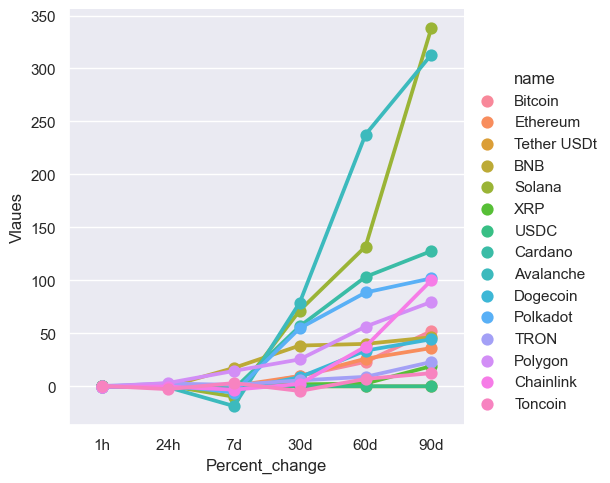

In [96]:
sns.catplot(x='Percent_change', y='Vlaues', hue='name', data=df7, kind='point')


In [90]:
df10 = df1[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query('name == "Bitcoin"')
df10

,name,quote.USD.price,timestamp
0,Bitcoin,42608.10959,2023-12-31 20:34:08.564974
15,Bitcoin,42608.10959,2023-12-31 20:35:01.474786
30,Bitcoin,42606.46232,2023-12-31 20:35:12.241587
45,Bitcoin,42606.46232,2023-12-31 20:35:53.670800
60,Bitcoin,42606.46232,2023-12-31 20:36:04.271258


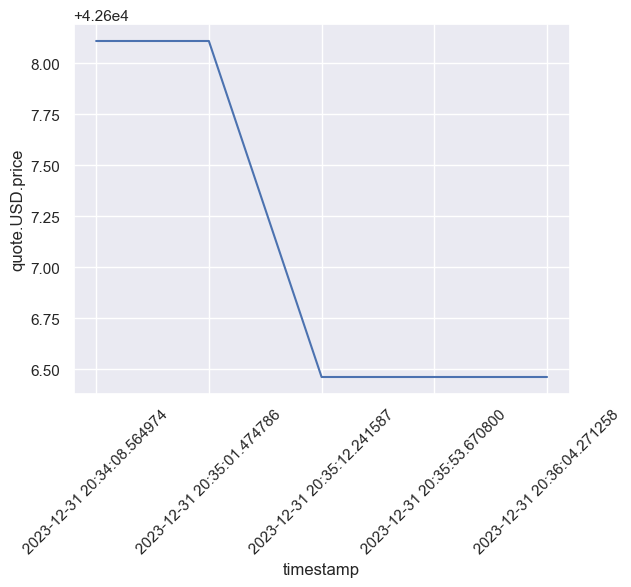

In [99]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price',data = df10)
plt.xticks(rotation=45)
plt.show()